In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


[[ -7   0]
 [ -1  -1]
 [ -1  -6]
 ...
 [ -2   8]
 [ -3 -10]
 [  7  -9]]


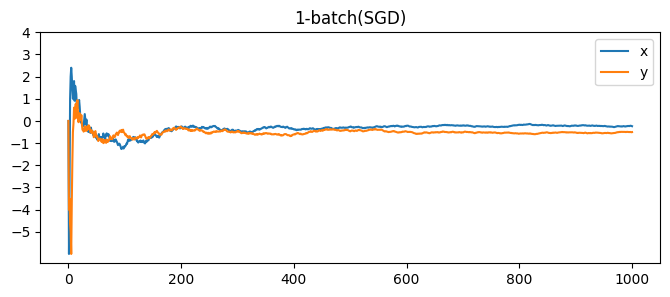

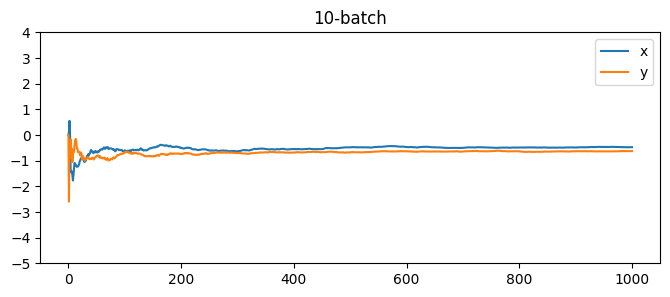

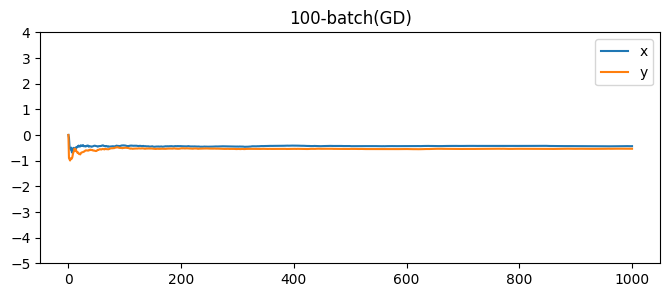

In [9]:
# SGD
x = np.random.randint(-10, 10, size=(1000, 2))
print(x)

def train_mean_estimation(batch_size, note):
    w = np.array([0, 0])
    results = np.array([[0, 0]])
    for i in range(0, 1000):
        batch = np.random.randint(0, 1000, size=batch_size)
        w = w - 1 / (i + 1) * (w - x[batch].mean(axis=0))
        results = np.append(results, [w], axis=0)

    plt.figure(figsize=(8, 3))
    plt.plot(results[:, 0], label="x")
    plt.plot(results[:, 1], label="y")
    plt.yticks(np.arange(-5, 5, 1))
    plt.legend()
    plt.title(note)
    plt.show()

train_mean_estimation(batch_size=1, note="1-batch(SGD)")
train_mean_estimation(batch_size=10, note="10-batch")
train_mean_estimation(batch_size=100, note="100-batch(GD)")

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.linspace(-10, 10, 1000)
Y = 2 * X**2 + 3 * X + 5

def quadratic_function(X, a, b, c):
    return a * X**2 + b * X + c

def loss_function(Y_pred, Y):
    return np.mean((Y_pred - Y) ** 2)

In [18]:
def train(learning_rate, batch_size, note):
    # a,b,c就是上面所说的 [w1,w2,w3]
    a = np.random.randn()
    b = np.random.randn()
    c = np.random.randn()
    loss = 1000
    cnt = 0
    results = np.array([0])
    while loss > 0.01:
        cnt += 1
        batch = np.random.randint(0, 1000, size=(1, batch_size))

        x = X[batch]
        y = Y[batch]

        y_pred = quadratic_function(x, a, b, c)

        loss = loss_function(y_pred, y)
        results = np.append(results, loss)
        # 这些是计算得到的梯度
        grad_a = ((y_pred - y) * x**2).mean()
        grad_b = ((y_pred - y) * x).mean()
        grad_c = ((y_pred - y)).mean()

        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

        valid_batch = np.random.randint(0, 1000, size=(1, 5))
        x = X[valid_batch]
        y = Y[valid_batch]
        y_pred = quadratic_function(x, a, b, c)
        loss = loss_function(y_pred, y)

        # results = np.append(results,loss)

    print("最终系数为：", a, b, c)
    print("最后迭代次数：", cnt)
    y_pred = quadratic_function(X, a, b, c)
    plt.figure(figsize=(8, 3))
    # plt.plot(X,y_pred,label="predict")
    plt.plot(X, Y, label="target")
    plt.plot(X, y_pred, label="predict")
    plt.title(note)
    plt.legend()
    plt.show()
    # print(a,b,c)

    plt.figure(figsize=(8, 3))
    plt.plot(results[:150], label="x")
    # plt.plot(results[:,1],label='y')
    # plt.yticks(np.arange(-5,5,1))
    plt.legend()
    plt.title(note)
    plt.show()


最终系数为： 2.0083578500800656 3.0028465291022206 4.467203453196224
最后迭代次数： 46773


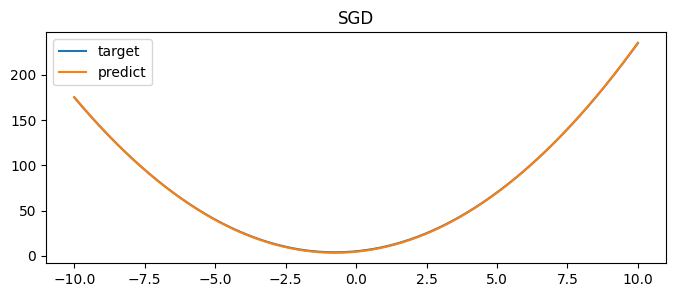

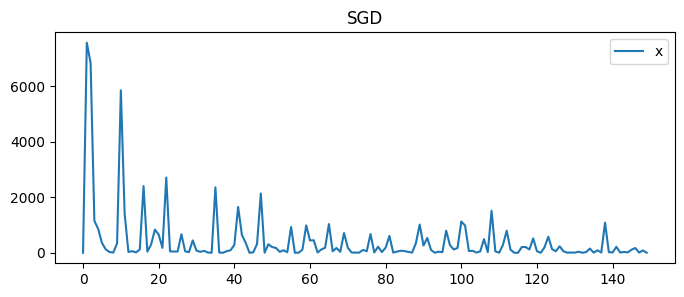

In [19]:
train(learning_rate=0.0001, batch_size=1, note="SGD")


最终系数为： 2.0144421917860513 2.999431076256721 4.182083924425057
最后迭代次数： 42430


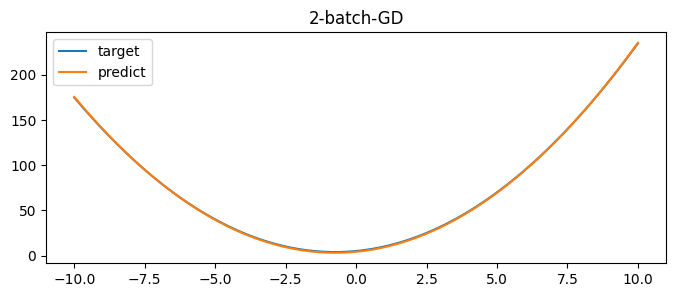

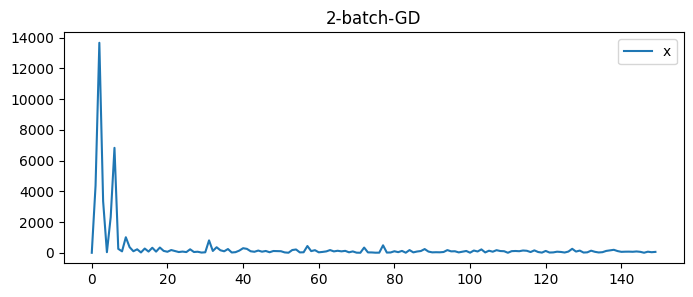

In [20]:
train(learning_rate=0.0001, batch_size=2, note="2-batch-GD")

最终系数为： 2.0139211641569386 2.99982163009703 4.157376351661624
最后迭代次数： 39731


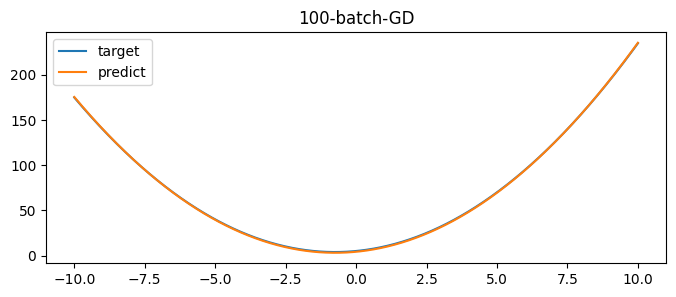

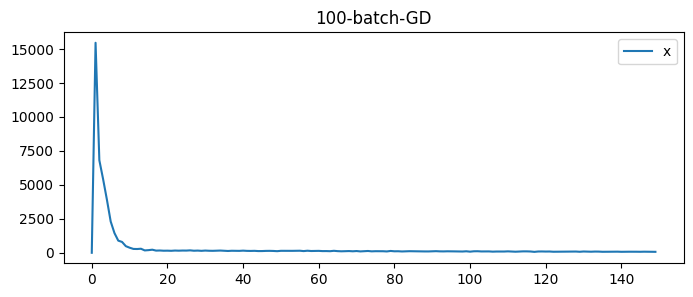

In [21]:
train(learning_rate=0.0001, batch_size=100, note="100-batch-GD")